In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
# import astropy.stats as astats

In [3]:
sns.set_theme()

## Utility code

In [4]:
def ecdf_factory(data):
    def ecdf(y):
        return np.asarray([np.sum(data <= x) / len(data) for x in y])
    return ecdf

def padfn(x, N):
    return np.pad(x, (0,max(N,0)), mode="constant", constant_values=0)

def entropy_fun(sample_counts, ref_counts):
    print("X", sample_counts)
    # First, compute ref_counts to a probability distribution
    ref_counts = ref_counts / np.sum(ref_counts)
    
    N = max(len(sample_counts), len(ref_counts))
    ref_counts = padfn(ref_counts, N - len(ref_counts))
    sample_counts = padfn(sample_counts, N - len(sample_counts))
    # print(ref_counts)
    print(sample_counts)
    summand = 0
    for i in range(N):
        if sample_counts[i] == 0:
            continue
        if ref_counts[i] == 0:
            continue
        summand += sample_counts[i] * np.log(sample_counts[i] / ref_counts[i])
    return summand


In [5]:
def diff_means(sample, ref):
    """ Compute the difference of means of two distributions, with samples
    x1 and x2. x1 is the sample data, x2 is the reference data.
    """
    return sample.mean() - ref.mean()

def rel_diff_means(sample, ref):
    return (sample.mean() - ref.mean()) / ref.mean()

def entropy(sample, ref):
    return entropy_fun(sample, ref)

def ks_stat(sample, ref):
    return scipy.stats.ks_2samp(sample, ref).statistic

def EP_stat(sample, ref):
    return scipy.stats.epps_singleton_2samp(sample, ref).statistic

def stdErr(sample, ref):
    return np.sqrt(sample.std() / len(sample) + ref.std() / len(ref))

def SEM(sample, ref):
    return np.sqrt(sample.std() / len(sample) + ref.std() / len(ref))


def diff_var(sample, ref):
    return sample.var() - ref.var()

def diff_skew(sample, ref):
    return sample.skew() - ref.skew()

def diff_kurtosis(sample, ref):
    return sample.kurtosis() - ref.kurtosis()

### Data Imports

In [6]:
def getData_SE(state_index="22XLaa", state_index2="25XLaa"):
    metadata = pd.read_parquet(f"../../data/RealDataSplit/metadata.small{state_index}.rnd20.SE.simulated.parquet")
    df_si = {}
    df_ie = {}

    pop_sizes = metadata["pop_size"].unique().astype(int)
    R0_values = metadata["R0"].unique().astype(int)

    for index, row in metadata.iterrows():
        R0 = int(row.R0)
        if R0 == row.R0:
            # k = k.0
            pass
        else:
            # Can't neglect the decimal part
            R0 = row.R0
        pop_size = int(row.pop_size)
        df_si[pop_size, R0] = pd.read_parquet(f"../../data/RealDataSplit/sackin.small{state_index}.rnd20.SE.simulated.{pop_size}.{R0}.parquet")
        df_si[pop_size, R0]
        df_ie[pop_size, R0] = pd.read_parquet(f"../../data/RealDataSplit/ei.small{state_index}.rnd20.SE.simulated.{pop_size}.{R0}.parquet")
        if state_index2 is not None:
            temp = pd.read_parquet(f"../../data/RealDataSplit/sackin.small{state_index2}.rnd20.SE.simulated.{pop_size}.{R0}.parquet")
            df_si[pop_size, R0] = pd.concat([df_si[pop_size, R0], temp])
            temp = pd.read_parquet(f"../../data/RealDataSplit/ei.small{state_index2}.rnd20.SE.simulated.{pop_size}.{R0}.parquet")
            df_ie[pop_size, R0] = pd.concat([df_ie[pop_size, R0], temp])

    df_si["ref"] = pd.read_csv("../../data/RealData_ref/sackin.rnd20.SE.1M.csv", names = ["index", "Sackin"], header=0)  
    df_ie["ref"] = pd.read_csv("../../data/RealData_ref/ie.rnd20.SE.1M.csv", names = ["index", "EI"], header=0)
    return df_ie, df_si, pop_sizes, R0_values, metadata

def getData_EU(state_index="12a", state_index2="15a"):
    metadata = pd.read_parquet(f"../../data/RealDataSplit/metadata.small{state_index}.rnd20.EU.simulated.parquet")
    df_si = {}
    df_ie = {}

    pop_sizes = metadata["pop_size"].unique().astype(int)
    R0_values = metadata["R0"].unique().astype(int)

    for index, row in metadata.iterrows():
        R0 = int(row.R0)
        if R0 == row.R0:
            # k = k.0
            pass
        else:
            # Can't neglect the decimal part
            R0 = row.R0
        pop_size = int(row.pop_size)
        df_si[pop_size, R0] = pd.read_parquet(f"../../data/RealDataSplit/sackin.small{state_index}.rnd20.EU.simulated.{pop_size}.{R0}.parquet")
        df_si[pop_size, R0]
        df_ie[pop_size, R0] = pd.read_parquet(f"../../data/RealDataSplit/ei.small{state_index}.rnd20.EU.simulated.{pop_size}.{R0}.parquet")
        if state_index2 is not None:
            temp = pd.read_parquet(f"../../data/RealDataSplit/sackin.small{state_index2}.rnd20.EU.simulated.{pop_size}.{R0}.parquet")
            df_si[pop_size, R0] = pd.concat([df_si[pop_size, R0], temp])
            temp = pd.read_parquet(f"../../data/RealDataSplit/ei.small{state_index2}.rnd20.EU.simulated.{pop_size}.{R0}.parquet")
            df_ie[pop_size, R0] = pd.concat([df_ie[pop_size, R0], temp])

    df_si["ref"] = pd.read_csv("../../data/RealData_ref/sackin.rnd20.EU.1M.csv", names = ["index", "Sackin"], header=0)  
    df_ie["ref"] = pd.read_csv("../../data/RealData_ref/ie.rnd20.EU.1M.csv", names = ["index", "EI"], header=0)
    return df_ie, df_si, pop_sizes, R0_values, metadata

In [7]:
df_ie_SE, df_si_SE, pop_sizes_SE, R0_values_SE, metadata_SE = getData_SE()
df_ie_EU, df_si_EU, pop_sizes_EU, R0_values_EU, metadata_EU = getData_EU()

In [8]:
tests = [diff_means, rel_diff_means, ks_stat, stdErr, diff_skew, diff_kurtosis]  # entropy, 
keys = [x.__name__ for x in tests]

## Aggregated data and testing

In [9]:
ct_p_values_EU = np.unique(df_si_EU[pop_sizes_EU[0], R0_values_EU[0]]["ct_p"].values)

results_ei3_EU = {}
index=0
for test, key in zip(tests, keys):
    results_ei3_EU[key] = {}
    for ct_p in ct_p_values_EU:
        data = []
        for pop_size in pop_sizes_EU:
            for R0 in R0_values_EU:
                data_temp = df_ie_EU[pop_size, R0][df_ie_EU[pop_size, R0]["ct_p"].values == ct_p]["ei"].copy()
                data.append(data_temp)
        data = pd.concat(data)
        results_ei3_EU[key][index] = {"ct_p": ct_p, "statistic": test(data, df_ie_EU["ref"]["EI"])}
        index += 1


In [10]:
ct_p_values_SE = np.unique(df_si_SE[pop_sizes_SE[0], R0_values_SE[0]]["ct_p"].values)

results_ei3_SE = {}
index=0
for test, key in zip(tests, keys):
    results_ei3_SE[key] = {}
    for ct_p in ct_p_values_SE:
        data = []
        for pop_size in pop_sizes_SE:
            for R0 in R0_values_SE:
                data_temp = df_ie_SE[pop_size, R0][df_ie_SE[pop_size, R0]["ct_p"].values == ct_p]["ei"].copy()
                data.append(data_temp)
        data = pd.concat(data)
        results_ei3_SE[key][index] = {"ct_p": ct_p, "statistic": test(data, df_ie_SE["ref"]["EI"])}
        index += 1

In [11]:
results3_ei_SE_ = {}
for key in keys:
    results3_ei_SE_[key] = pd.DataFrame.from_dict(results_ei3_SE[key]).T

results3_ei_EU_ = {}
for key in keys:
    results3_ei_EU_[key] = pd.DataFrame.from_dict(results_ei3_EU[key]).T

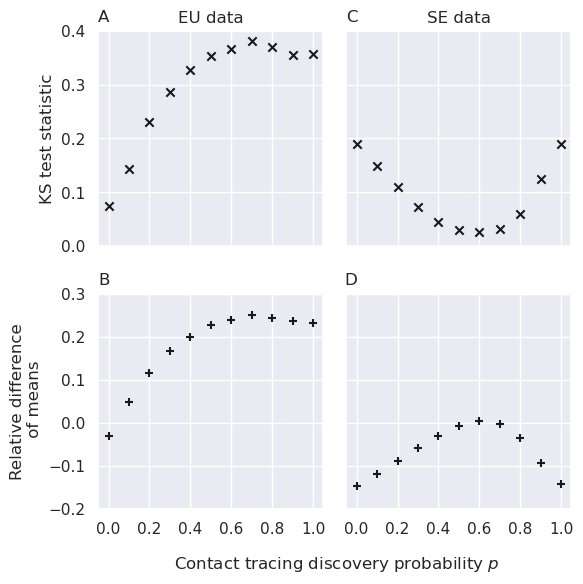

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(6,6), sharey="row", sharex=True)
color_codes = ["k", "k"]
suptitle = None  # declare here to avoid scope warning
styles = ["x", "+"]
labels = ["A", "B", "C", "D"]
rdx = 0
idx = 0
ptr = 0

for rdx in range(2):
    if rdx == 0:
        res = results3_ei_EU_
    elif rdx == 1:
        res = results3_ei_SE_
    else:
        raise ValueError("rdx must be 0 or 1")
    for idx, series in enumerate([res["ks_stat"], res["rel_diff_means"]]):
        x = series["ct_p"].values
        y = series["statistic"].values
        ax[idx, rdx].scatter(x,y, c=color_codes[rdx], marker=styles[idx])
        ax[idx, rdx].text(0.05, 1.1, labels[ptr], transform=ax[idx, rdx].transAxes,
                          fontsize=12, va='top', ha='right')
        ptr += 1
        
        ax[idx, rdx].grid(True)
        ax[idx, rdx].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        suptitle = fig.suptitle(r"Contact tracing discovery probability $p$", y=-0.0, x=0.575,fontsize=12)
        ax[1, rdx].set_ylim(-0.2, 0.3)
        ax[0, rdx].set_ylim(0, 0.4)
        ax[0, 0].set_ylabel("KS test statistic")
        ax[1, 0].set_ylabel("Relative difference\n of means")
        ax[0,0].set_title("EU data")
        ax[0,1].set_title("SE data")

plt.tight_layout()
plt.show()
